In [1]:
import numpy as np

from numpy import linalg

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston, fetch_california_housing

from sklearn.linear_model  import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt

In [2]:
# dataset = load_boston()
dataset = fetch_california_housing()

X = dataset.data
y = dataset.target


normalize = lambda x: (x - x.mean()) / x.std()


X_train = X[:450, :]
# X_train = normalize(X_train)
y_train = y[:450].reshape(-1,1)

X_test = X[450:, :]
y_test = y[450:].reshape(-1,1)

num_rows = X_train.shape[0]
num_cols = X_train.shape[1]




In [3]:
X_train.shape, y_train.shape

((450, 8), (450, 1))

In [4]:
# num_rows = int(input("number of rows:"))
# num_cols = int(input("number of columns: "))

In [5]:
# X_train = 2 * np.random.rand(num_rows,num_cols)
# y_train = 4 + 3 * X_train[:, 0].reshape(-1,1) + np.random.randn(num_rows,1)

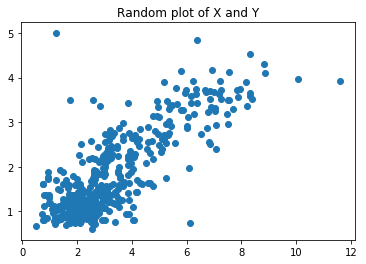

In [6]:
plt.title("Random plot of X and Y")
plt.scatter(X_train[:, 0], y_train)
plt.show()

In [7]:
X_b = np.c_[np.ones((num_rows,1)), X_train]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# theta_best

In [8]:
X_b[1], y_train[1]

(array([ 1.00000000e+00,  8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,  3.78600000e+01,
        -1.22220000e+02]), array([3.585]))

In [9]:
theta_best

array([[-9.18096740e+01],
       [ 3.01306608e-01],
       [-5.35048731e-03],
       [ 2.81635884e-02],
       [-7.80011633e-01],
       [ 1.28119394e-04],
       [-7.61519429e-02],
       [ 9.02959708e+00],
       [ 2.02675729e+00]])

In [10]:
theta = np.random.randn(num_cols+1,1) * 1e-2


In [11]:
# theta = np.random.uniform(-1/num_cols+1 , 1/num_cols+1, (num_cols+1,1) ) *1e-2

In [12]:
theta

array([[ 0.00856178],
       [ 0.0042269 ],
       [-0.00993854],
       [ 0.01139976],
       [-0.00766401],
       [ 0.01326484],
       [-0.00924206],
       [ 0.01189839],
       [-0.0176063 ]])

In [13]:
# mse = lambda y, yhat: np.mean([(y-yhat)**2 for i in range(len(y))])

mse = lambda y, yhat: mean_squared_error(y_true = y, y_pred = yhat)

In [14]:
m = X_b.shape[0]
eta = 1e-7
it = 1000

for i in range(it):
    
    preds = X_b.dot(theta)
    
    loss = mse(y_train, preds)
    r2score = r2_score(y_true = y_train, y_pred = preds)
    
    if i % 2 == 0:
        print("Loss: {} at iteration : {} \t".format(loss, i))
        print("R2 Score: {} at iteration: {} \n".format(r2score, i))
    
#     ri = np.random.randint(low = 0, high = m, size = 1)
    
    gradient = 2 / m * ( X_b.T.dot(preds.reshape(-1,1) - y_train)  )
    

#     for i in range(1, len(gradient)):
        
#         gradient[i] += (0.45 * np.abs(theta[i]) )
        
    
    if i% 20 == 0:

        theta = theta - eta * gradient


    

Loss: 217.84028380445173 at iteration : 0 	
R2 Score: -242.4317410815481 at iteration: 0 

Loss: 126.65856207505156 at iteration : 2 	
R2 Score: -140.53816617541997 at iteration: 2 

Loss: 126.65856207505156 at iteration : 4 	
R2 Score: -140.53816617541997 at iteration: 4 

Loss: 126.65856207505156 at iteration : 6 	
R2 Score: -140.53816617541997 at iteration: 6 

Loss: 126.65856207505156 at iteration : 8 	
R2 Score: -140.53816617541997 at iteration: 8 

Loss: 126.65856207505156 at iteration : 10 	
R2 Score: -140.53816617541997 at iteration: 10 

Loss: 126.65856207505156 at iteration : 12 	
R2 Score: -140.53816617541997 at iteration: 12 

Loss: 126.65856207505156 at iteration : 14 	
R2 Score: -140.53816617541997 at iteration: 14 

Loss: 126.65856207505156 at iteration : 16 	
R2 Score: -140.53816617541997 at iteration: 16 

Loss: 126.65856207505156 at iteration : 18 	
R2 Score: -140.53816617541997 at iteration: 18 

Loss: 126.65856207505156 at iteration : 20 	
R2 Score: -140.53816617541


Loss: 0.8846516015899241 at iteration : 482 	
R2 Score: 0.011421230891665135 at iteration: 482 

Loss: 0.8846516015899241 at iteration : 484 	
R2 Score: 0.011421230891665135 at iteration: 484 

Loss: 0.8846516015899241 at iteration : 486 	
R2 Score: 0.011421230891665135 at iteration: 486 

Loss: 0.8846516015899241 at iteration : 488 	
R2 Score: 0.011421230891665135 at iteration: 488 

Loss: 0.8846516015899241 at iteration : 490 	
R2 Score: 0.011421230891665135 at iteration: 490 

Loss: 0.8846516015899241 at iteration : 492 	
R2 Score: 0.011421230891665135 at iteration: 492 

Loss: 0.8846516015899241 at iteration : 494 	
R2 Score: 0.011421230891665135 at iteration: 494 

Loss: 0.8846516015899241 at iteration : 496 	
R2 Score: 0.011421230891665135 at iteration: 496 

Loss: 0.8846516015899241 at iteration : 498 	
R2 Score: 0.011421230891665135 at iteration: 498 

Loss: 0.8846516015899241 at iteration : 500 	
R2 Score: 0.011421230891665135 at iteration: 500 

Loss: 0.8845222253146247 at i


Loss: 0.8840044105365786 at iteration : 896 	
R2 Score: 0.012144452704347386 at iteration: 896 

Loss: 0.8840044105365786 at iteration : 898 	
R2 Score: 0.012144452704347386 at iteration: 898 

Loss: 0.8840044105365786 at iteration : 900 	
R2 Score: 0.012144452704347386 at iteration: 900 

Loss: 0.8839854611556991 at iteration : 902 	
R2 Score: 0.01216562822202194 at iteration: 902 

Loss: 0.8839854611556991 at iteration : 904 	
R2 Score: 0.01216562822202194 at iteration: 904 

Loss: 0.8839854611556991 at iteration : 906 	
R2 Score: 0.01216562822202194 at iteration: 906 

Loss: 0.8839854611556991 at iteration : 908 	
R2 Score: 0.01216562822202194 at iteration: 908 

Loss: 0.8839854611556991 at iteration : 910 	
R2 Score: 0.01216562822202194 at iteration: 910 

Loss: 0.8839854611556991 at iteration : 912 	
R2 Score: 0.01216562822202194 at iteration: 912 

Loss: 0.8839854611556991 at iteration : 914 	
R2 Score: 0.01216562822202194 at iteration: 914 

Loss: 0.8839854611556991 at iteratio

In [15]:
theta

array([[ 0.00855057],
       [ 0.00420414],
       [-0.01041511],
       [ 0.01135066],
       [-0.00767624],
       [-0.00013548],
       [-0.00927476],
       [ 0.01147477],
       [-0.01623603]])

In [16]:
gradient

array([[  0.10242694],
       [ -2.36930948],
       [  2.86682162],
       [ -0.69917406],
       [  0.16236331],
       [ -1.38659174],
       [  0.74290447],
       [  3.82478929],
       [-12.50723506]])

In [17]:
preds = X_b.dot(theta)

In [18]:
mse(y_train, preds)

0.8839100029712694

In [19]:
r2_score(y_train, preds)

0.012249951088728506

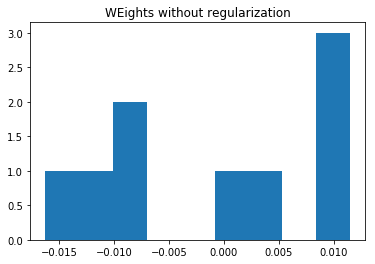

In [20]:
plt.hist(theta, bins = len(theta))
plt.title("WEights without regularization")
plt.show()

In [21]:
see = X_b.T

In [22]:
see.shape

(9, 450)

In [23]:
np.mean( see[1] )

3.2988268888888888

In [24]:
np.var(see[1])

3.4086850332547654

In [25]:
np.std(see[1])

1.8462624497223479

In [26]:
mse(y_train, X_b.dot(theta_best) )

0.21338434569976383

In [27]:
r2_score(y_train, X_b.dot(theta_best))

0.7615476720555993

In [28]:
sgdreg = SGDRegressor(penalty = 'none', max_iter = it, verbose = 5, learning_rate = 'constant', eta0 = eta,
                     early_stopping = False, fit_intercept = False, shuffle = False, warm_start = False)

In [29]:
sgdreg.fit(X_train, y_train)

-- Epoch 1
Norm: 0.00, NNZs: 8, Bias: 0.000000, T: 450, Avg. loss: 0.643165
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 8, Bias: 0.000000, T: 900, Avg. loss: 0.486778
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 1350, Avg. loss: 0.399629
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 1800, Avg. loss: 0.342706
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 2250, Avg. loss: 0.305625
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 2700, Avg. loss: 0.281547
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 3150, Avg. loss: 0.265977
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 3600, Avg. loss: 0.255961
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 8, Bias: 0.000000, T: 4050, Avg. loss: 0.249559
Total training time: 0.00 sec

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=1e-07, fit_intercept=False, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=False, tol=0.001,
             validation_fraction=0.1, verbose=5, warm_start=False)

In [30]:
mse(y_train, sgdreg.predict(X_train))

1.098065506305861

In [31]:
r2_score(y_train, sgdreg.predict(X_train))

-0.2270641286052384